# **2. Stochastic Process**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa import arima_process
from statsmodels.tsa import stattools

### White Noise

$$
Y_t = \mu + \epsilon_t
$$
$$
\epsilon_t \sim N(0, \sigma^2)
$$

c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


<BarContainer object of 13 artists>

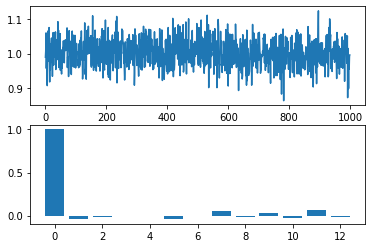

In [159]:
def WhiteNoise(mean, std, size):
    return np.random.normal(mean, std, size)

wn = WhiteNoise(mean= 1, std= 0.04, size= 1000)

fig, axs = plt.subplots(2)
axs[0].plot(wn)
axs[1].bar(range(13), stattools.acf(wn, nlags = 12))

### Auto Regressive Process

$$
Y_t = \mu + \sum_{i=1}^{N} \phi Y_{t-i} + \epsilon_t
$$
$$
\epsilon_t \sim N(0, \sigma^2)
$$

c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


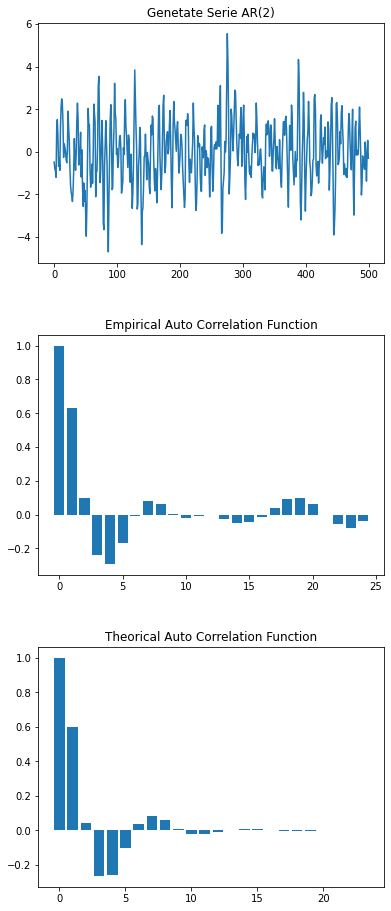

In [61]:
ar = arima_process.ArmaProcess(ar = [1, -0.9, 0.5]).generate_sample(500)


fig, axs = plt.subplots(3, 1)
axs[0].plot(ar)
axs[0].set_title("Genetate Serie AR(2)")
axs[1].bar(range(25), stattools.acf(ar, nlags= 24))
axs[1].set_title("Empirical Auto Correlation Function")
axs[2].bar(range(24), arima_process.ArmaProcess(ar = [1, -0.9, 0.5]).acf(24))
axs[2].set_title("Theorical Auto Correlation Function")
plt.subplots_adjust(left=0.1,
                    bottom=2, 
                    right=0.9, 
                    top=5, 
                    wspace=0, 
                    hspace=0.3)

### Moving Average Process

$$
Y_t = \mu + \sum_{i=1}^{N} \epsilon_{t-i} + \epsilon_t
$$
$$
\epsilon_t \sim N(0, \sigma^2)
$$

c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


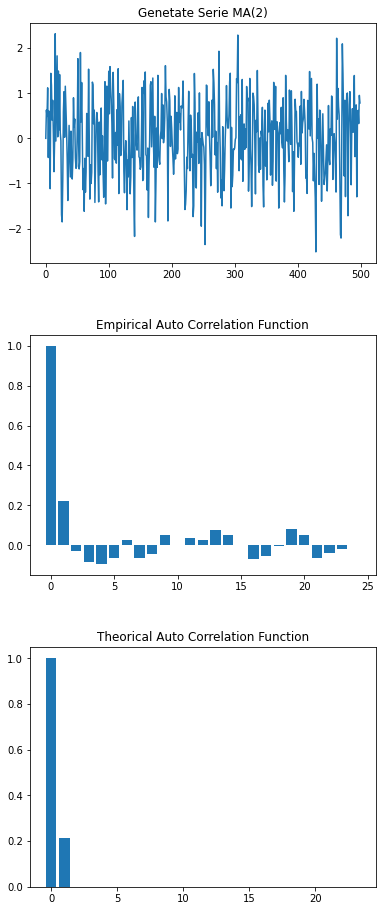

In [68]:
ma = arima_process.ArmaProcess(ma = [0, 0.9, 0.2]).generate_sample(500)


fig, axs = plt.subplots(3, 1)
axs[0].plot(ma)
axs[0].set_title("Genetate Serie MA(2)")
axs[1].bar(range(25), stattools.acf(ma, nlags= 24))
axs[1].set_title("Empirical Auto Correlation Function")
axs[2].bar(range(24), arima_process.ArmaProcess(ma = [0, 0.9, 0.2]).acf(24))
axs[2].set_title("Theorical Auto Correlation Function")
plt.subplots_adjust(left=0.1,
                    bottom=2, 
                    right=0.9, 
                    top=5, 
                    wspace=0, 
                    hspace=0.3)

### ARMA Process

$$
Y_t = \mu + \sum_{i=1}^{N} \phi Y_{t-i} + \sum_{j=1}^{M} \epsilon_{t-j} + \epsilon_t
$$
$$
\epsilon_t \sim N(0, \sigma^2)
$$

c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


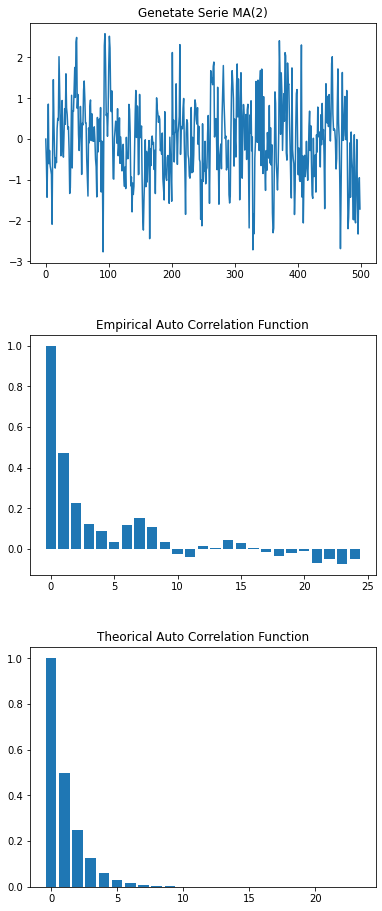

In [182]:
arma = arima_process.ArmaProcess(ar = [1, -0.5], ma = [0, 0.9]).generate_sample(500)

fig, axs = plt.subplots(3, 1)
axs[0].plot(arma)
axs[0].set_title("Genetate Serie MA(2)")
axs[1].bar(range(25), stattools.acf(arma, nlags= 24))
axs[1].set_title("Empirical Auto Correlation Function")
axs[2].bar(range(24), arima_process.ArmaProcess(ar = [1, -0.5], ma  = [0, 0.9]).acf(24))
axs[2].set_title("Theorical Auto Correlation Function")
plt.subplots_adjust(left=0.1,
                    bottom=2, 
                    right=0.9, 
                    top=5, 
                    wspace=0, 
                    hspace=0.3)

### Brownian Motion

- $B_0 = 0$
- $B_t$ is continuos almost sure
- $B_t$ has independent increments
- $W_t - W_s \sim N(0, t-s)$ for $0 \leq s \leq t \leq 1$

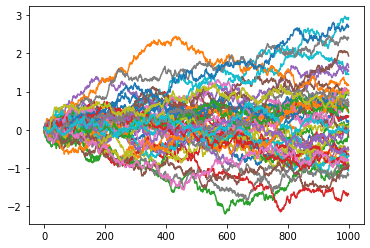

In [164]:
def BrownianMotion(size = 200):
    epslon = np.random.normal(0, 1, size)
    Bm = np.cumsum(epslon/np.sqrt(size[0]), 0)

    return Bm

plt.plot(BrownianMotion([1000, 50]))

### Aritimetic Brownian Motion

$$
A_t = \mu t + \sigma B_t
$$

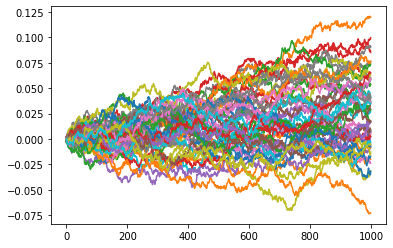

In [169]:
def AritimeticBrownianMotion(drift = 0, vol = 1, size = 200):
    Bm = BrownianMotion(size)
    t = np.arange(size[0])/size[0]

    ABm = np.array([t]).T *drift + vol*Bm

    return ABm

plt.plot(AritimeticBrownianMotion(drift=0.03, vol=0.04, size = [1000, 50]))

### Geometric Brownian Motion

$$
G_t = \exp \left( \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma B_t \right)
$$

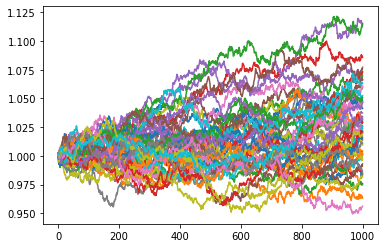

In [173]:
def GeometricBrownianMotion(drift = 0, vol = 1, size = 200):
    Bm = BrownianMotion(size)
    t = np.arange(size[0])/size[0]

    GBm = np.exp((drift - (vol**2)/2)*np.array([t]).T + vol*Bm)

    return GBm

plt.plot(GeometricBrownianMotion(drift= 0.03, vol=0.04, size = [1000, 50]))

### Brownian Bridge

$$
R_t = (1-t) B_t + t B_0
$$

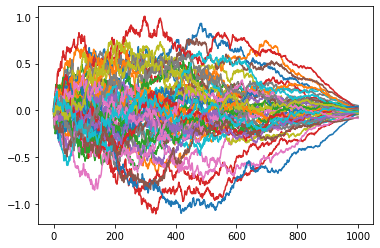

In [179]:
def BrownianBridge(size = 1000):
    Bm = BrownianMotion(size)
    t = np.arange(size[0])/size[0]

    Bb = (1-np.array([t]).T)*Bm + np.array([t]).T*Bm[0]
    return Bb

plt.plot(BrownianBridge(size = [1000, 50]))